## Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import folium
from folium import plugins

## 1. Data Ingestion

In [3]:
data = pd.read_csv('Data Faskes BPJS 2019.csv',header=0)

In [4]:
data.head()

,NoLink,Provinsi,KotaKab,Link,TipeFaskes,No,KodeFaskes,NamaFaskes,LatLongFaskes,AlamatFaskes,TelpFaskes
0,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,1,0001R001,RSU Cut Nyak Dhien\r\n \r\n...,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,\r\n 0641-0621039\r\n
1,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,2,0001R004,RSU Cut Meutia Langsa\r\n \...,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,\r\n 0641- 4840076\r\n
2,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,3,0105R001,RSUD Langsa\r\n \r\n ...,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,\r\n 0641-22051\r\n
3,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,4,0105R013,RSU Ummi \r\n \r\n ...,"http://maps.google.co.id/?q=4.470376,97.991915",Jln. Prof. A. Madjid Ibrahim,\r\n 0641-22886\r\n
4,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Puskesmas,1,00010001,Langsa Lama\r\n \r\n ...,"http://maps.google.co.id/?q=4.478172,97.949988",Gampong Meurandeh Dayah,\r\n 0641-064121218\r\n


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29157 entries, 0 to 29156
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NoLink         29157 non-null  int64 
 1   Provinsi       29157 non-null  object
 2   KotaKab        29157 non-null  object
 3   Link           29157 non-null  object
 4   TipeFaskes     29157 non-null  object
 5   No             29157 non-null  object
 6   KodeFaskes     29157 non-null  object
 7   NamaFaskes     29157 non-null  object
 8   LatLongFaskes  29157 non-null  object
 9   AlamatFaskes   29157 non-null  object
 10  TelpFaskes     29157 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


## 2. Data Cleaning

**Bersihkan nama dan spasi**

In [6]:
def cleanNama(row):
    str = row.replace('Kode Faskes dan Alamat Rumah Sakit BPJS di','')
    return str

def removeSpace(row):
    str = ' '.join(row.split())
    return str

In [7]:
data['KotaKab'] = data['KotaKab'].apply(removeSpace).apply(cleanNama)
data['NamaFaskes'] = data['NamaFaskes'].apply(removeSpace)
data['TelpFaskes'] = data['TelpFaskes'].apply(removeSpace)
data.drop(['Link','NoLink'], axis=1, inplace=True)

data.head()

,Provinsi,KotaKab,TipeFaskes,No,KodeFaskes,NamaFaskes,LatLongFaskes,AlamatFaskes,TelpFaskes
0,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,1,0001R001,RSU Cut Nyak Dhien,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,0641-0621039
1,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,2,0001R004,RSU Cut Meutia Langsa,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,0641- 4840076
2,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,3,0105R001,RSUD Langsa,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,0641-22051
3,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,4,0105R013,RSU Ummi,"http://maps.google.co.id/?q=4.470376,97.991915",Jln. Prof. A. Madjid Ibrahim,0641-22886
4,Nanggroe Aceh Darussalam,Kota Langsa,Puskesmas,1,00010001,Langsa Lama,"http://maps.google.co.id/?q=4.478172,97.949988",Gampong Meurandeh Dayah,0641-064121218


**Bersihkan latitude dan longitude**

In [8]:
def searchLatLong(row):
    str = re.search('(-?([0-9]{1}|[0-9]0|[1-8]{1,2}).[0-9]{1,6},(-?(1[0-8]{1,2}|9[1-9]{1}).[1-9]{1,6}))', row)
    if str:
        return str.group()
    return np.NaN

data['LatLongFaskes'] = data['LatLongFaskes'].apply(searchLatLong)

lat = []
lon = []

for row in data['LatLongFaskes']:
    try:
        latitude = float(row.split(',')[0])
        longitude = float(row.split(',')[1])
        if (-90.0 <= latitude <= 90.0):
            lat.append(latitude)
        else:
            lat.append(np.NaN)
        
        if (-180 <= longitude <= 180):
            lon.append(longitude)
        else:
            lon.append(np.NaN)
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)
        
data['Latitude'] = lat
data['Longitude'] = lon

data.drop(['LatLongFaskes'], axis=1, inplace=True)
data.head()

,Provinsi,KotaKab,TipeFaskes,No,KodeFaskes,NamaFaskes,AlamatFaskes,TelpFaskes,Latitude,Longitude
0,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,1,0001R001,RSU Cut Nyak Dhien,Jl. Tm Bahrum No. 1 Langsa,0641-0621039,4.488058,97.947963
1,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,2,0001R004,RSU Cut Meutia Langsa,Jl.Garuda Kebun Baru Langsa,0641- 4840076,4.488088,97.947781
2,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,3,0105R001,RSUD Langsa,Jln.A.Yani No. 1 Langsa,0641-22051,4.472208,97.975533
3,Nanggroe Aceh Darussalam,Kota Langsa,Rumah Sakit,4,0105R013,RSU Ummi,Jln. Prof. A. Madjid Ibrahim,0641-22886,4.470376,97.991915
4,Nanggroe Aceh Darussalam,Kota Langsa,Puskesmas,1,00010001,Langsa Lama,Gampong Meurandeh Dayah,0641-064121218,4.478172,97.949988


## 3. Data Analysis

**1. Provinsi dengan Fasilitas Kesehatan ber-BPJS**

In [9]:
provinsi = data['Provinsi'].unique().tolist()
print(provinsi)
print('\nTotal provinsi: ', len(provinsi))

['Nanggroe Aceh Darussalam', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi', 'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kep. Bangka Belitung', 'Dki Jakarta', 'Jawa Barat', 'Jawa Tengah', 'D I Yogyakarta', 'Jawa Timur', 'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan', 'Kalimantan Timur', 'Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Gorontalo', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Sulawesi Barat', 'Kepulauan Riau', 'Kalimantan Utara']

Total provinsi:  34


**2. Kota/Kabupaten dengan Fasilitas Kesehatan ber-BPJS**

In [10]:
kabkota = data['KotaKab'].unique().tolist()
print(kabkota)
print('\nTotal kota: ', len(kabkota))

[' Kota Langsa', ' Kab. Gayo Lues', ' Kab. Aceh Selatan', ' Kab. Aceh Tenggara', ' Kab. Aceh Timur', ' Kab. Aceh Tengah', ' Kab.Aceh Barat', ' Kab. Aceh Besar', ' Kab. Pidie', ' Kab. Aceh Tamiang', ' Kab. Aceh Utara', ' Kab. Bireun', ' Kota Lhokseumawe', ' Kab. Aceh Singkil', ' Kab. Simeulue', ' Kota Banda Aceh', ' Kota Sabang', ' Kab. Aceh Jaya', ' Kab. Nagan Raya', ' Kab. Aceh Barat Daya', ' Kab. Bener', ' Kab. Pidie Jaya', ' Kab. Subulussalam', ' Kab. Nias', ' Kab. Mandailing Natal', ' Kab. Tapanuli Selatan', ' Kab. Tapanuli Tengah', ' Kab. Tapanuli Utara', ' Kab. Toba Samosir', ' Kab. Labuhanbatu', ' Kab. Asahan', ' Kab. Simalungun', ' Kab. Dairi', ' Kab. Karo', ' Kab. Deli Serdang', ' Kab. Langkat', ' Kota Sibolga', ' Kota Tanjung Balai', ' Kota Pematang Siantar', ' Kota Tebing Tinggi', ' Kota Medan', ' Kota Binjai', ' Kab. Serdang Bedagai', ' Kab. Samosir', ' Kab. Pakpak Bharat', ' Kab. Nias Selatan', ' Kab. Humbang Hasundutan', ' Kota Padang Sidempuan', ' Kab. Batu Bara', ' Kab.

**Geographically available and unavailable data**

In [11]:
total_data_count = data.shape[0]
geographically_available_data_count = data.dropna().shape[0]
geographically_unavailable_data_count = data[data['Latitude'].isnull() | data['Longitude'].isnull()].shape[0]

print('\nTotal data fasilitas: ', total_data_count)
print('\nTotal fasilitas yang dapat ditampilkan di map: ', geographically_available_data_count)
print('\nTotal fasilitas yang tidak dapat ditampikan di map: ',geographically_unavailable_data_count)


Total data fasilitas:  29157

Total fasilitas yang dapat ditampilkan di map:  16499

Total fasilitas yang tidak dapat ditampikan di map:  12658


## 4. Data Visualization

### Visualisasi geografis 16499 fasilitas kesehatan ber-BPJS

**Visualisasi data dengan data geografis dengan folium FastMarkCluster**

In [12]:
data_map = data.dropna()
data_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 0 to 29149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      16499 non-null  object 
 1   KotaKab       16499 non-null  object 
 2   TipeFaskes    16499 non-null  object 
 3   No            16499 non-null  object 
 4   KodeFaskes    16499 non-null  object 
 5   NamaFaskes    16499 non-null  object 
 6   AlamatFaskes  16499 non-null  object 
 7   TelpFaskes    16499 non-null  object 
 8   Latitude      16499 non-null  float64
 9   Longitude     16499 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.4+ MB


In [13]:
data_map = data.dropna()
rome_lat, rome_lng = -6.200000, 106.816666
# init the folium map object
my_map = folium.Map(location=[rome_lat,rome_lng],zoom_start=5)
# add all the point from the file to the map object using FastMarkCluster
my_map.add_child(plugins.FastMarkerCluster(data_map[['Latitude','Longitude']].values.tolist()))

my_map

**Visualisasi jumlah per kota/kabupaten dengan latitude dan longitude yang tersedia**

In [14]:
data_kotakab = data['KotaKab'].value_counts().rename_axis('KotaKab').reset_index(name='Jumlah')
data_kotakab.head()

,KotaKab,Jumlah
0,Kota Surabaya,364
1,Kota Semarang,305
2,Kab. Bogor,298
3,Kota Makassar,292
4,Kota Palembang,288


In [15]:
# Mengambil latitude dan longitude data per kota/kabupaten
kabkota = []
prov = []
latk = []
lonk = []

data_n = data.dropna() #hapus kota/kab tanpa latitude/longtitude agar data dapat dibuat map

for prv, kk, ltk, lnk in zip(data_n['Provinsi'], data_n['KotaKab'], data_n['Latitude'], data_n['Longitude']):
    if (not(kk in kabkota) and not(ltk == np.NaN) and not(lnk == np.NaN)):
        prov.append(prv)
        kabkota.append(kk)
        latk.append(ltk)
        lonk.append(lnk)
        
print(len(kabkota))

data_map = pd.DataFrame(list(zip(prov,kabkota,latk,lonk)),columns=['Provinsi','KotaKab','Latitude','Langitude'])
data_map.head()

460


,Provinsi,KotaKab,Latitude,Langitude
0,Nanggroe Aceh Darussalam,Kota Langsa,4.488058,97.947963
1,Nanggroe Aceh Darussalam,Kab. Gayo Lues,4.059445,97.463333
2,Nanggroe Aceh Darussalam,Kab. Aceh Selatan,3.111916,97.368642
3,Nanggroe Aceh Darussalam,Kab. Aceh Tenggara,3.496266,97.800000
4,Nanggroe Aceh Darussalam,Kab. Aceh Timur,4.961196,97.762670


In [16]:
merged = pd.merge(data_map, data_kotakab, on='KotaKab')
merged.count()

Provinsi     460
KotaKab      460
Latitude     460
Langitude    460
Jumlah       460
dtype: int64

In [17]:
# Create map
bpjs_map = folium.Map(location=[10, -20], zoom_start=2.3, tiles='Stamen Toner')

for lat, lon, prov, kotakab, jml in zip(merged['Latitude'], merged['Langitude'], merged['Provinsi'], merged['KotaKab'], merged['Jumlah']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Provinsi</strong>: ' + str(prov) + '<br>'
                                '<strong>Kota/Kab</strong>: ' + str(kotakab) + '<br>'
                                '<strong>Jumlah</strong>: ' + str(jml)),
                       color='red',
                       fill_color='red',
                       fill_opacitiy=0.3).add_to(bpjs_map)
 
bpjs_map

**Data berdasarkan provinsi**

In [18]:
data_sorted = pd.DataFrame({'Provinsi':merged['KotaKab'], 'Jumlah':merged['Jumlah']})
data_sorted = data_sorted.sort_values(by=['Jumlah'],ascending=False)

data_sorted.head()

,Provinsi,Jumlah
243,Kota Surabaya,364
201,Kota Semarang,305
151,Kab. Bogor,298
103,Kota Palembang,288
169,Kota Bandung,276


## Visualisasi barplot 29157 data

**Kota/Kabupaten dengan jumlah fasilitas kesehatan ber-BPJS tertinggi**

29157

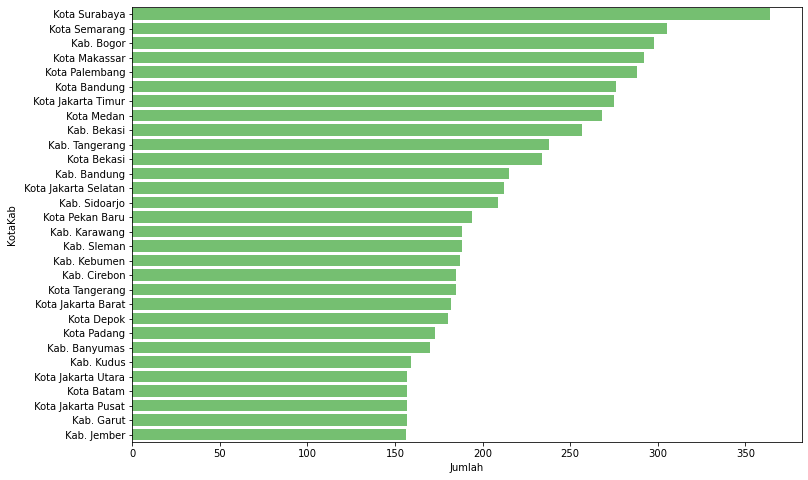

In [21]:
temp_data = pd.DataFrame({'KotaKab':data_kotakab['KotaKab'],'Jumlah':data_kotakab['Jumlah']})
#data_sorted = temp_data.sort_values(by=['Jumlah'], ascending=False)[:30]

f, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes("muted")
sns.barplot(x='Jumlah',y='KotaKab',data=data_kotakab[:30],
           label='Jumlah',color='g')

data_kotakab['Jumlah'].sum()

**Kota/Kabupaten dengan jumlah fasilitas kesehatan ber-BPJS terendah**

<AxesSubplot:xlabel='Jumlah', ylabel='KotaKab'>

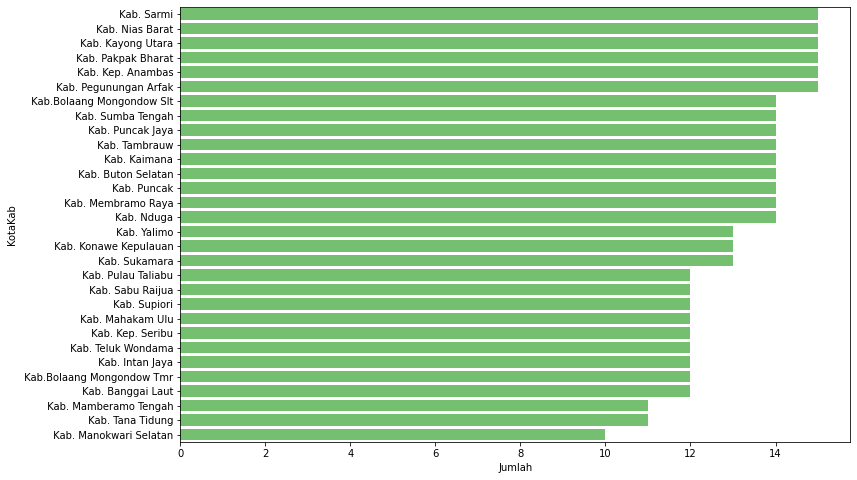

In [22]:
temp_data = pd.DataFrame({'KotaKab':data_kotakab['KotaKab'],'Jumlah':data_kotakab['Jumlah']})
data_sorted_asc = temp_data.sort_values(by=['Jumlah'], ascending=False)

f, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes("muted")
sns.barplot(x='Jumlah',y='KotaKab', data=data_kotakab.tail(30),
           label='Jumlah',color='g')

**Visualisasi jumlah fasilitas kesehatan ber-BPJS pada berdasarkan provinsi**

In [23]:
data_provinsi = data['Provinsi'].value_counts().rename_axis('Provinsi').reset_index(name='Jumlah')
data_provinsi.head()

,Provinsi,Jumlah
0,Jawa Tengah,3688
1,Jawa Barat,3683
2,Jawa Timur,3548
3,Sumatera Utara,1628
4,Sulawesi Selatan,1155


<AxesSubplot:xlabel='Jumlah', ylabel='Provinsi'>

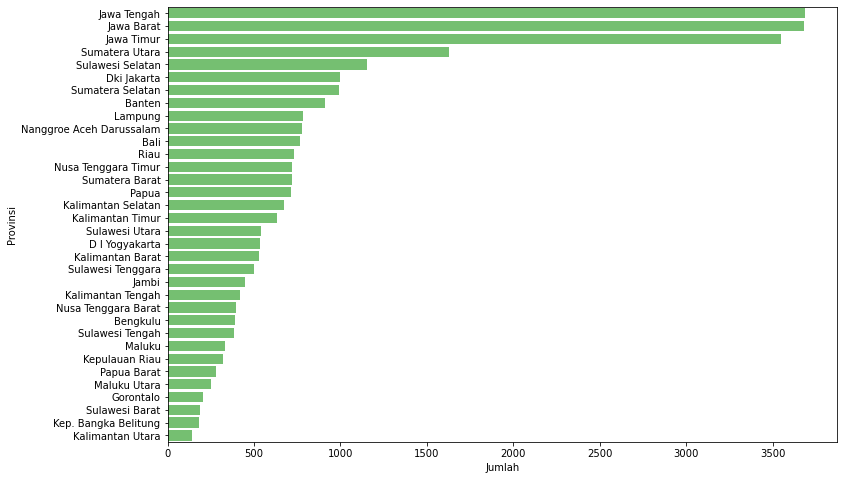

In [24]:
temp_data = pd.DataFrame({'Provinsi':data_provinsi['Provinsi'],'Jumlah':data_provinsi['Jumlah']})
data_sorted = temp_data.sort_values(by=['Jumlah'],ascending=False)

f, ax = plt.subplots(figsize=(12,8))

sns.set_color_codes('muted')
sns.barplot(x='Jumlah',y='Provinsi',data=data_provinsi,
           label='Jumlah',color='g')